# GridsearchCV

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
wine.target

# Här har vi våra wine_classes targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Train|test split

In [15]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89, 13), (89, 13), (89,), (89,))

## Pipeline & gridsearch

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()


# Constructing different pipelines for different models
# När vi kör pipelinen kmr den scala vår data och sen köra knn på den
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipe_logistic = Pipeline(
    [
        ("scaler", scaler),
        (
            "log",
            LogisticRegression(
                penalty="elasticnet", solver="saga", multi_class="auto", max_iter=10000
            ),
        ),
    ]
)

# saga = stochastic aga 

# Specify parameters to tune
# knn är namnet jag gett den, två underscore och sen parametern den ska tunea
param_grid_KNN = {"knn__n_neighbors": list(range(1, 50))}
param_grid_logistic = {
    "log__l1_ratio": np.linspace(0, 1, 20)
}  # can add more parameters key-value pairs

classifier_KNN = GridSearchCV(
    estimator=pipe_KNN, param_grid=param_grid_KNN, cv=5, scoring="accuracy"
)

classifier_logistic = GridSearchCV(
    estimator=pipe_logistic, param_grid=param_grid_logistic, cv=5, scoring="accuracy"
)


In [18]:
classifier_KNN

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [19]:
classifier_logistic

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

# Train Models

In [22]:
# train the models
classifier_KNN.fit(X_train, y_train)

classifier_logistic.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [23]:
## Vi ser flera olika parametrar, den som är intressant för oss är knn__n_neighbors

classifier_KNN.best_estimator_.get_params() # k

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [24]:
# Den har tränats på träningsdatan och den gör cross validation(ett visst antal steg)
classifier_logistic.best_estimator_.get_params() # k = 5 found

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(l1_ratio=0.3157894736842105, max_iter=10000,
                      penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(l1_ratio=0.3157894736842105, max_iter=10000,
                    penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.3157894736842105,
 'log__max_iter': 10000,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

## Prediction and evaluation

In [26]:

# classifier_knn innehåller skalaren i pipelinen
y_pred_KNN = classifier_KNN.predict(X_test)
y_pred_KNN

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       1])

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



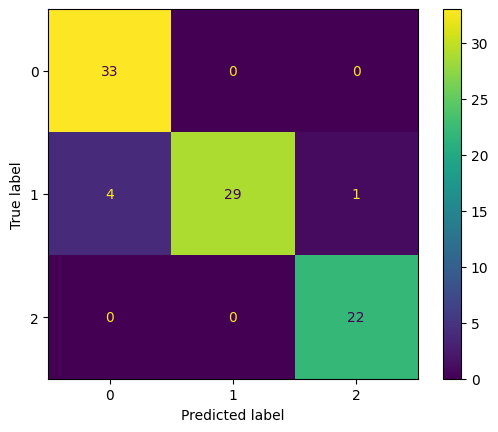

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_KNN))
cm = confusion_matrix(y_test, y_pred_KNN)
ConfusionMatrixDisplay(cm).plot();

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



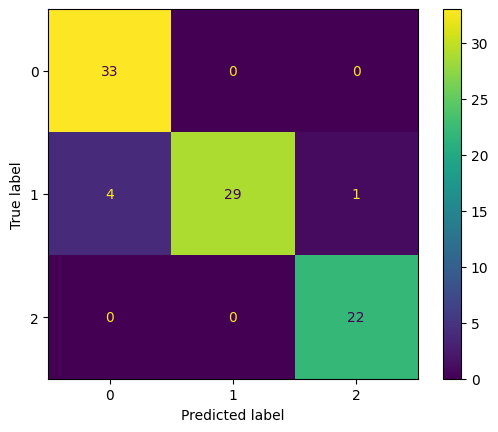

In [31]:
# classifier_knn innehåller skalaren i pipelinen
y_pred_logistic = classifier_KNN.predict(X_test)

print(classification_report(y_test, y_pred_KNN))
cm = confusion_matrix(y_test, y_pred_KNN)
ConfusionMatrixDisplay(cm).plot();